In [1]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
import src.grimoire as Grimoire
import src.decks as Decks
from src.grimoire import By
# import src.decks as Decks


In [2]:
commander = "The Ur-Dragon"
# grim = Grimoire.Grimoire(omnicomprehensive=True)
# Decks.fetch(By.COMMANDER, commander,do_load=False,upper_limit=1000)
grim = Grimoire.fetch(By.COMMANDER,commander)

Carico le carte dal grimorio di The Ur-Dragon


In [3]:
from src.card import Filters
# Crea la matrice di correlazione
g = grim.filter( 
    positive_filters=[
        Filters.isLegalInCommander,
        # Filters.isCreature,
        # Filters.isGreen
        # Filters.isColorless
    ], 
    negative_filters=[
        Filters.isToken
        # Filters.isCreature
        # Filters.isLegendary
    ])
print(f'{len(grim)-len(g)} su {len(g)} carte filtrate')

0 su 8946 carte filtrate


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import time



# Funzione per calcolare i cluster e restituire i risultati con il tempo impiegato
def calculate_clusters(data, metric, thresholds, linkage_methods):
    results = {}
    times = {}
    for method in linkage_methods:
        num_clusters = []
        start_time = time.time()  # Inizio misurazione tempo
        for threshold in thresholds:
            distance_matrix = pdist(data, metric=metric)
            linked = linkage(distance_matrix, method=method)
            clusters = fcluster(linked, t=threshold, criterion='distance')
            num_clusters.append(len(set(clusters)))
        end_time = time.time()  # Fine misurazione tempo
        results[method] = num_clusters
        times[method] = (end_time - start_time)/len(thresholds)  # Calcolo del tempo
    return results, times

# Funzione per visualizzare i risultati del clustering
def plot_clusters(thresholds, metric, results, times):
    plt.figure(figsize=(10, 6))
    for method, num_clusters in results.items():
        plt.plot(thresholds, num_clusters, marker='o', label=f"{method} (avg {times[method]:.2f}s)")

    plt.title(f'Numero di Cluster per {metric.capitalize()}')
    plt.xlabel('Soglia di Distanza')
    plt.ylabel('Numero di Cluster')
    plt.axhline(y=1, color='gray', linestyle='--')  # linea per il numero minimo di cluster
    plt.grid()
    plt.legend()
    plt.show()
  

In [5]:
  
# Supponiamo che grim.vectorize() restituisca i dati e i nomi delle carte
vectors, card_names = grim.vectorize()
data = np.array(list(vectors.values()))

thresholds = {
    'cityblock': np.arange(0, 451, 50),  # Da 0 a 450 con incrementi di 50
    'hamming': np.arange(0, 0.06, 0.01),  # Da 0 a 0.05 con incrementi di 0.01
    'euclidean': np.arange(0, 31, 3)    # Da 10 a 50 con incrementi di 10
}

# Elenco dei metodi di linkage
linkage_methods = ['single', 'complete', 'ward', 'centroid', 'median', 'average']


In [6]:
metrics = list(thresholds.keys())
thresholds = list(thresholds.values())

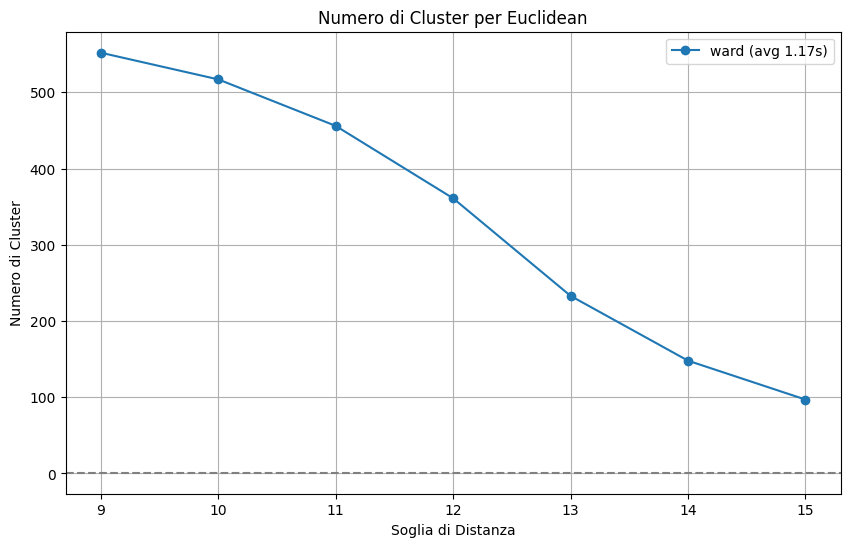

In [7]:
i=2 # Manhattan
thresholds[i] = np.array([9, 10,11,12,13,14,15])
results, times = calculate_clusters(data, 'euclidean', thresholds[i], ['ward'])
plot_clusters(thresholds[i], metrics[i], results, times)

In [8]:
# i=1 # hamming
# thresholds[i] = np.sort(np.concatenate((thresholds[i], [0.005, 0.0115, 0.013, 0.014, 0.017])))
# results, times = calculate_clusters(data, metrics[i], thresholds[i], linkage_methods)
# plot_clusters(thresholds[i], metrics[i], results, times)

KeyboardInterrupt: 

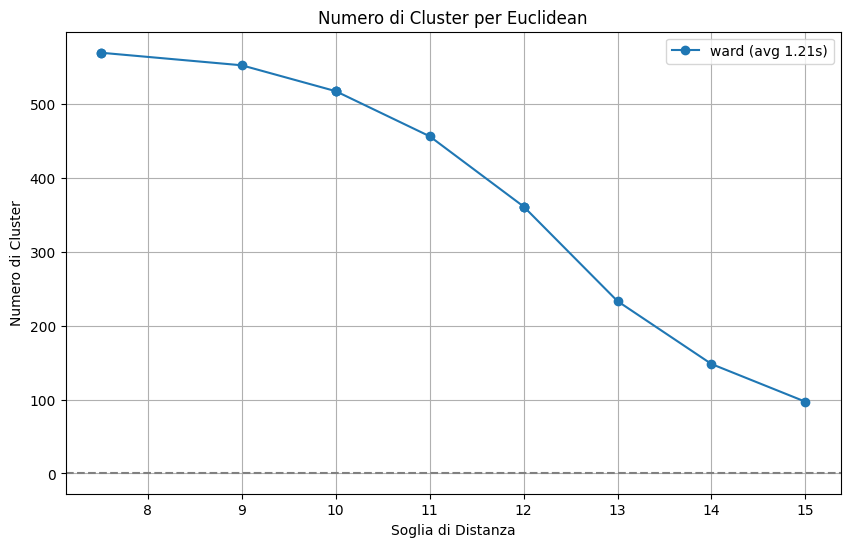

In [10]:
i=2 # 
thresholds[i] = np.sort(np.concatenate((thresholds[i], [7.5,10,12])))
results, times = calculate_clusters(data, metrics[i], thresholds[i], [ 'ward'])
plot_clusters(thresholds[i], metrics[i], results, times)

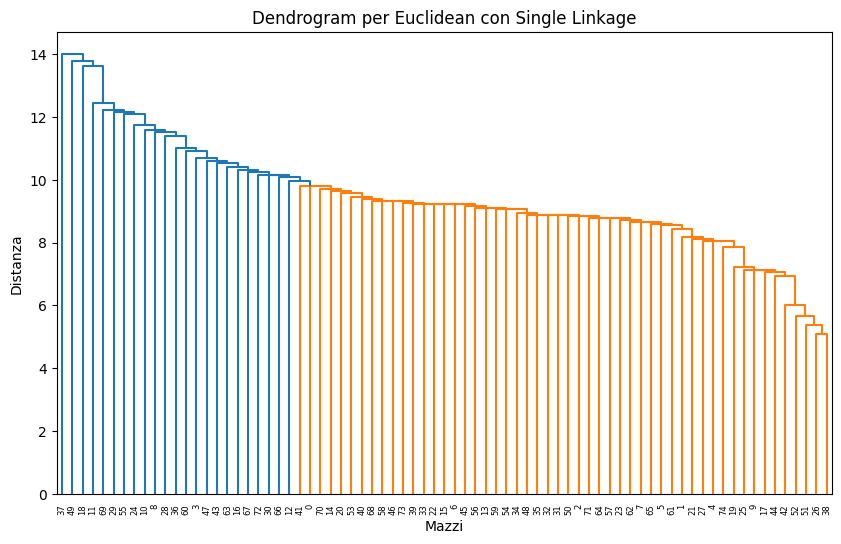

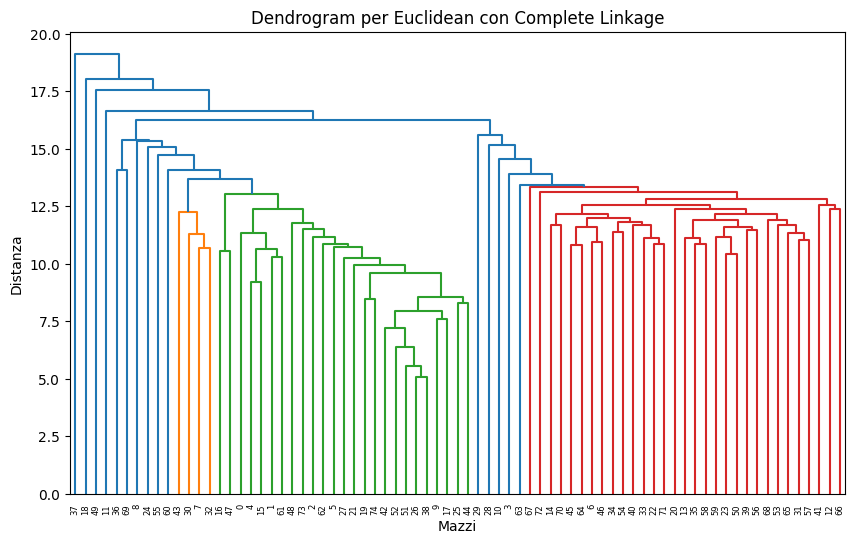

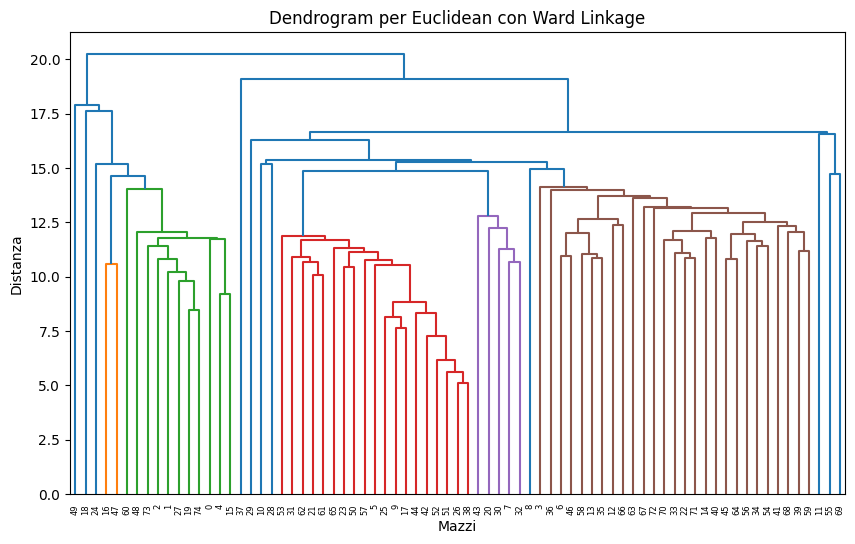

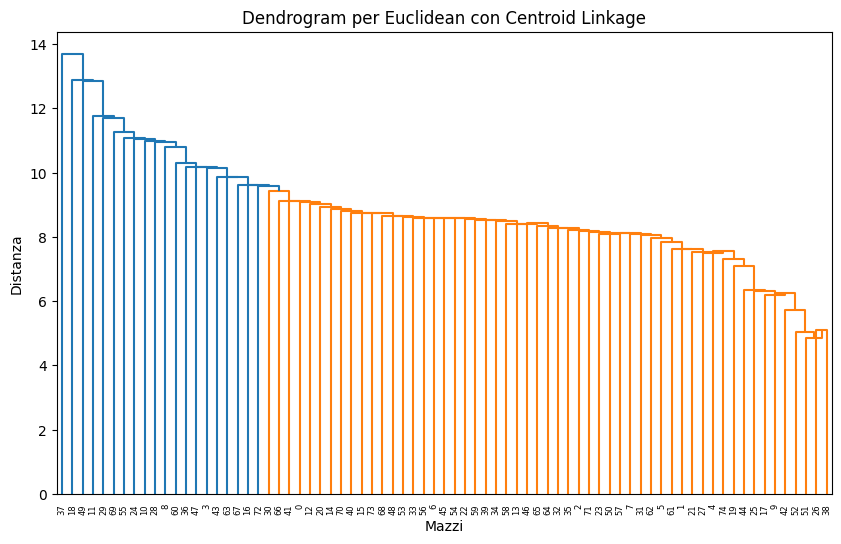

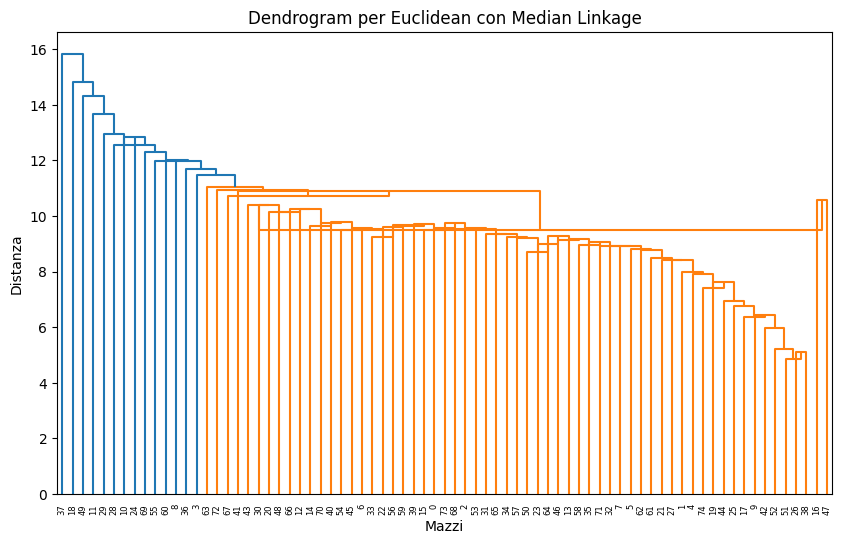

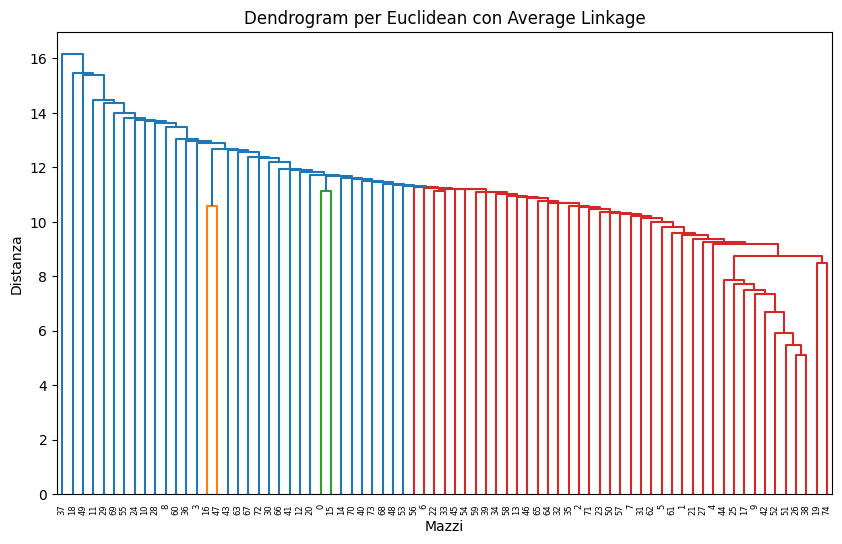

In [23]:
from scipy.cluster.hierarchy import dendrogram

# Esegui il clustering per ogni metrica e metodo di linkage
for method in linkage_methods:
    metric='euclidean'
    # Calcolare la matrice di distanza
    distance_matrix = pdist(data, metric=metric)
    linked = linkage(distance_matrix, method=method)

    # Crea il dendrogramma
    plt.figure(figsize=(10, 6))
    dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
    plt.title(f'Dendrogram per {metric.capitalize()} con {method.capitalize()} Linkage')
    plt.xlabel('Mazzi')
    plt.ylabel('Distanza')
    plt.show()



Numero di cluster con K-means: 5


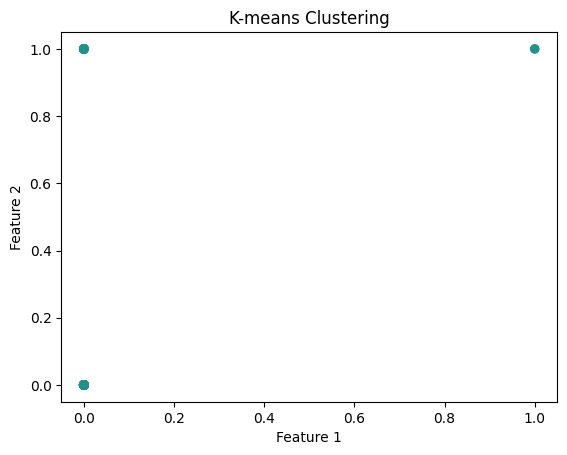

In [24]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Genera i dati
vectors, card_names = grim.vectorize()
data = np.array(list(vectors.values()))

# Scegli il numero di cluster
num_clusters = 5  # Modifica questo numero secondo necessità

# Esegui K-means
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(data)

# Stampa il numero di cluster
print(f"Numero di cluster con K-means: {len(set(clusters))}")

# (Opzionale) Traccia i risultati
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [25]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

vectors, card_names = grim.vectorize()

data = np.array(list(vectors.values()))
distance_matrix = pdist(data, metric='cityblock')
linked = linkage(distance_matrix, method='average')
distance_threshold = 0.01

clusters = fcluster(linked, t=distance_threshold, criterion='distance')

print(f"Numero di cluster: {len(set(clusters))}")


Numero di cluster: 75


In [26]:
from src.card import Card

partial = [
    Card(commander),
    Card("Sword of Feast and Famine"),
    Card("Roaring Earth"),
    Card("Inspiring Call"),
    Card("Shadowspear"),
    Card("Bone Sabres"),
    Card("Basilisk Collar")
    ]
partial_array = np.array(grim.partial_vector(partial))

In [27]:
import numpy as np
from scipy.spatial.distance import hamming 
from collections import Counter

# Imposta il numero di mazzi e cluster più vicini da considerare
num_nearest_decks = 10  # Numero di mazzi più vicini da considerare per il completamento
num_nearest_clusters = 10  # Numero di cluster più vicini da considerare

# Lista 'partial' che rappresenta il mazzo parziale
partial_array = np.array(partial_array)


# Trova i cluster più vicini
closest_clusters = []
for i, cluster_id in enumerate(set(clusters)):
    cluster_indices = np.where(clusters == cluster_id)[0]
    cluster_data = data[cluster_indices]
    avg_distance = np.mean([hamming(partial_array, deck) for deck in cluster_data]) 
    closest_clusters.append((cluster_id, avg_distance))

# Ordina i cluster per distanza e seleziona i `num_nearest_clusters` cluster più vicini
closest_clusters = sorted(closest_clusters, key=lambda x: x[1])[:num_nearest_clusters]

# Combina tutti i mazzi dai cluster più vicini
closest_decks = []
for cluster_id, _ in closest_clusters:
    cluster_indices = np.where(clusters == cluster_id)[0]
    cluster_decks = data[cluster_indices]
    
    # Calcola la distanza di Hamming e seleziona i mazzi più vicini
    deck_distances = [(deck, hamming(partial_array, deck)) for deck in cluster_decks]  
    sorted_decks = sorted(deck_distances, key=lambda x: x[1])[:num_nearest_decks]
    closest_decks.extend([deck for deck, _ in sorted_decks])

# Trova le carte più frequenti nei mazzi vicini
missing_card_indices = np.where(partial_array == 0)[0]
card_counts = Counter()

for deck in closest_decks:
    card_counts.update(np.where(deck == 1)[0])

# Rimuovi le carte già presenti in 'partial_array'
for index in np.where(partial_array == 1)[0]:
    card_counts.pop(index, None)

# Ottieni una lista delle carte più probabili per completare 'partial_array'
most_probable_cards = [idx for idx, _ in card_counts.most_common()]

print("Carte più probabili per completare il mazzo:")
advised_cards = []
for card_i in most_probable_cards:
    card = card_names[card_i]
    if card not in partial and card.filter(negative_filters=[Filters.isBasic]):
        advised_cards.append(card)

for card in advised_cards:
    print(card)


Carte più probabili per completare il mazzo:
Hardened Scales
Bristly Bill, Spine Sower
Toski, Bearer of Secrets
Rishkar's Expertise
Evolution Sage
Slime Against Humanity
Heroic Intervention
Forgotten Ancient
Innkeeper's Talent
Emerald Medallion
The Ozolith
Kami of Whispered Hopes
Tribute to the World Tree
Ozolith, the Shattered Spire
Beast Within
Branching Evolution
Return of the Wildspeaker
Rishkar, Peema Renegade
Beast Whisperer
Champion of Lambholt
Garruk's Uprising
Locket of Yesterdays
Elvish Mystic
Fyndhorn Elves
Utopia Sprawl
Armorcraft Judge
Renata, Called to the Hunt
Stocking the Pantry
Vigor
Scavenging Ooze
Defiler of Vigor
Managorger Hydra
Season of Gathering
Gyre Sage
Eternal Witness
Fanatic of Rhonas
Fangs of Kalonia
Kenrith's Transformation
Lightning Greaves
Nykthos, Shrine to Nyx
Arbor Elf
Swiftfoot Boots
Rogue's Passage
Momentous Fall
Thrumming Stone
Garruk, Primal Hunter
Harmonize
Semblance Anvil
Cemetery Prowler
Lair of the Hydra
Boseiju, Who Endures
Doubling Season
Se